# Women in tech: a look at the Stack Overflow Annual Developer Surveys

This notebook serves as a guide to this [blog post](https://medium.com/@gabrielsgaspar/women-in-tech-a-look-at-the-stack-overflow-annual-developer-surveys-7ffacf0586c2).

## Table of contents
- [1. Business undestanding](#business)
- [2. Data understanding](#data)
    - [2.1. Gathering data](#gather)
    - [2.2. Assessing data](#assess)
- [3. Prepare data](#prepare)
- [4. Data modeling](#model)
- [5. Evaluate the results](#eval)
- [6. Deploy](#deploy)

<a name="business"></a>
## 1. Business understanding

In this notebook we will try to address the following questions using data from [Stack Overflow Annual Developer Survey](https://insights.stackoverflow.com/survey).

- [Are more women participating in the Stack Overflow Annual Developer surveys?](#q1)
- [Are men happier than women in the tech world?](#q2)\
- [What countries have the highest job satisfaction for women?](#q3)

The following sections serve as a guide in order to understand the data and what needs to be done in order to answer the questions above.

<a name="data"></a>
## 2. Data understanding

We begin our work by downloading the data that we will need in order to address the questions layed out in [Section 1.](#business). We will then proceed to taking a look at our data to get a sense of what needs to be changed later on

<a name="gather"></a>
   

<a name="gather"></a>
### 2.1. Gathering data

First, we need to download all the necessary data. In order to do so, we can run the line below to download all Stack Overflow surveys for all years:

In [1]:
# Download survey data
%run -i '../download/download.py'

# Download shape files
%run -i '../download/shape.py'

These are all the surveys since 2011. We will only use the ones from the last five years. One of the reasons for doing so is that the structure of the survey changed and similar questions might not be comparable anymore. Next, in preparation for the next sections we can import the relevant libraries.

In [2]:
# Import libraries
import imageio
import geopandas as gpd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from IPython.display import Image
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandarallel import pandarallel
from pycountry import countries
from tqdm.auto import tqdm
%matplotlib inline

In [3]:
# Set defaul style plot
plt.style.use('seaborn-white')

<a name="assess"></a>
### 2.2. Assessing data

Now that we have downloaded all the datasets let's start by reading the csvs from the past five years. In doing so, I am ignoring the first column as it serves as an ordered identifier for the respondents.

In [4]:
# Import survey data and skip first column
import warnings; warnings.simplefilter('ignore')
survey_2016 = pd.read_csv("../data/survey/survey_2016.csv").iloc[:, 1:]
survey_2017 = pd.read_csv("../data/survey/survey_2017.csv").iloc[:, 1:]
survey_2018 = pd.read_csv("../data/survey/survey_2018.csv").iloc[:, 1:]
survey_2019 = pd.read_csv("../data/survey/survey_2019.csv").iloc[:, 1:]
survey_2020 = pd.read_csv("../data/survey/survey_2020.csv").iloc[:, 1:]

# Import shapefile with geopandas
map_df = gpd.read_file("../data/shapefile/world_countries_2017.shp")

Great! Now we can quickly look at what these datasets look like. I will do that by picking two random samples from the survey.

In [5]:
# Show dataframe for two random samples for 2020
pd.options.display.max_columns = None # to show all columns
survey_2020.sample(2)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
26267,I am a developer by profession,Yes,34.0,10,Monthly,6000.0,86412.0,Bahamas,Cayman Islands dollar,KYD,MongoDB,PostgreSQL,"Database administrator;Designer;Developer, bac...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",Black or of African descent,Man,Remote work options;Office environment or comp...,Very satisfied,"I’m not actively looking, but I am open to new...",Swift,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,.NET Core,.NET;Node.js,NaN,Confluence;Jira;Github;Gitlab;Slack;Google Sui...,Yes,Extremely important,Not at all important/not necessary,Better compensation;Better work/life balance;W...,"Read company media, such as employee blogs or ...",Once a year,No,Onboarding? What onboarding?,Yes,Often: 1-2 days per week or more,Start a free trial;Visit developer communities...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Play games;Visit Stack Overflow;Do other work ...,MacOS,2 to 9 employees,Arduino;iOS;Kubernetes,AWS;Docker;Google Cloud Platform;Linux;MacOS,NaN,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",ASP.NET Core,Angular;ASP.NET;Django;jQuery,NaN,40.0,10,10
62682,I am a developer by profession,Yes,NaN,14,Monthly,17000.0,8316.0,Ukraine,Ukrainian hryvnia,UAH,NaN,NaN,"Developer, front-end","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,NaN,NaN,NaN,Slightly satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Somewhat important,Not at all important/not necessary,NaN,NaN,NaN,No,Yes,No,Never,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,NaN,2 to 9 employees,NaN,NaN,NaN,NaN,Yes,"No, not really",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,5,1


And for the remaining years we see:

In [6]:
# Random sample for 2019
survey_2019.sample(2)

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
86396,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Czech Republic,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,"1,000 to 4,999 employees","Developer, back-end;Developer, front-end;Devel...",10,20,25,Slightly satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,More than 4 years ago,"Write code by hand (e.g., on a whiteboard);Sol...",No,"Languages, frameworks, and other technologies ...","Something else changed (education, award, medi...",CZK,Czech koruna,80000.0,Monthly,42768.0,40.0,There is a schedule and/or spec (made by me or...,NaN,A few days each month,Office,Average,"Yes, because I see value in code review",2.0,"Yes, it's part of our process",Developers and management have nearly equal in...,I have some influence,HTML/CSS;Java;JavaScript;Kotlin;SQL,Dart;HTML/CSS;Java;JavaScript;Kotlin;TypeScript,Oracle;SQLite,Oracle;SQLite,Android,Android,Spring,React.js;Spring,NaN,Flutter;Node.js,Android Studio;IntelliJ,Windows,Development;Testing,Non-currency applications of blockchain,Useful across many domains and could change ma...,Yes,Yes,Yes,Twitter,In real life (in person),Username,2012,Daily or almost daily,Find answers to specific questions;Contribute ...,6-10 times per week,Stack Overflow was slightly faster,60+ minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,NaN,31.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
12662,I code primarily as a hobby,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,"Professional degree (JD, MD, etc.)","A health science (ex. nursing, pharmacy, radio...",Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications",13,16,NaN,NaN,NaN,Somewhat confident,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;PHP;Ruby;SQL,HTML/CSS;Ruby;SQL,MySQL,MySQL;SQLite,NaN,NaN,Angular/Angular.js,Angular/Angular.js,Node.js,NaN,Atom;Notepad++,Windows,I do not use containers,NaN,NaN,Yes,Also Yes,Yes,WhatsApp,In real life (in person),Username,2013,Less than once per month or monthly,Find answers to specific questions;Learn how t...,Less than once per week,Stack Overflow was much faster,0-10 minutes,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Courses on technologies you're interested in,28.0,Man,No,Gay or Lesbian,Hispanic or Latino/Latina;White or of European...,No,Appropriate in length,Easy


In [7]:
# Random sample for 2018
survey_2018.sample(2)

,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
22728,Yes,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",20 to 99 employees,Back-end developer;Designer;Desktop or enterpr...,6-8 years,3-5 years,Moderately satisfied,Moderately satisfied,Working in a different or more specialized tec...,I am not interested in new job opportunities,Between 1 and 2 years ago,7.0,9.0,2.0,1.0,3.0,5.0,4.0,10.0,6.0,8.0,2.0,5.0,1.0,10.0,8.0,4.0,9.0,3.0,11.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I had a negative experience or interaction at ...,U.S. dollars ($),65000,Yearly,65000.0,USD,Confluence;Jira;Office / productivity suite (M...,Three to six months,Received on-the-job training in software devel...,The official documentation and/or standards fo...,NaN,NaN,Neither Agree nor Disagree,Disagree,Agree,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;F#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/...,SQL Server;SQLite,SQL Server;SQLite,Android;Windows Desktop or Server,Android;Azure,Angular;.NET Core;Node.js;React;Cordova;Xamari...,Angular;.NET Core;React;Xamarin,Visual Studio;Visual Studio Code,Windows,2,Agile;Kanban;Pair programming;Scrum,Mercurial;Copying and pasting files to network...,Once a day,Yes,Yes,The website I was visiting forced me to disabl...,Somewhat agree,Neither agree nor disagree,Somewhat agree,Paid to access a website advertisement-free,5.0,6.0,1.0,7.0,3.0,2.0,4.0,Increasing automation of jobs,Artificial intelligence surpassing human intel...,The developers or the people creating the AI,I'm worried about the dangers more than I'm ex...,No,"Yes, but only within the company",Upper management at the company/organization,Yes,10 (Very Likely),Daily or almost daily,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a jobs boar...","No, and I don't know what that is",NaN,I'm not sure,A little bit interested,A little bit interested,Somewhat interested,Somewhat interested,Somewhat interested,Between 6:01 - 7:00 AM,9

In [8]:
# Random sample for 2017
survey_2017.sample(2)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
33584,Student,No,United Kingdom,No,"Not employed, but looking for work",I prefer not to answer,NaN,NaN,NaN,NaN,3 to 4 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I'm not actively looking, but I am open to new...",1.0,Not applicable/ never,Very important,Somewhat important,Very important,Important,Very important,Very important,Somewhat important,Important,Important,Somewhat important,Important,Important,Not at all important,Not very important,Important,Vacation/days off; Health benefits; Private of...,No,CW_Jobs,NaN,NaN,Important,Important,Very important,Somewhat important,Important,Very important,Very important,Not very important,Not very important,Very important,NaN,NaN,Tabs,NaN,NaN,NaN,NaN,Take online courses; Contribute to open source...,Noon,Python,NaN,.NET Core,NaN,NaN,NaN,Amazon Web Services (AWS),NaN,Visual Studio Code,Put on a movie or TV show,NaN,NaN,NaN,Disagree,Strongly agree,Agree,Strongly disagree,Somewhat agree,Strongly disagree,Strongly agree,Revenue performance,Very satisfied,Satisfied,Somewhat satisfied,Satisfied,Satisfied,Not at all satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I've visited Stack Overflow, but haven't logge...",9.0,Desktop,Several times,Several times,Haven't done 

In [9]:
# Random sample for 206
survey_2016.sample(2)

,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,experience_range,experience_midpoint,salary_range,salary_midpoint,big_mac_index,tech_do,tech_want,aliens,programming_ability,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
55946,Twitter,United States,North America,North America,40-49,44.5,Male,Developer; Programmer; Sr. Developer; Expert; ...,Enterprise level services developer,Enterprise level services developer,11+ years,13.0,"$140,000 - $150,000",145000.0,4.93,Android; C#; iOS; JavaScript; SQL; SQL Server;...,"Android; C#; Cloud (AWS, GAE, Azure, etc.); SQ...",Yes,9.0,Employed full-time,Web Services,20-99 employees,1-4 people,0,Full-time remote,I love my job,Self-employed - I created my own job,Notepad++; Visual Studio; Xamarin; Xcode,Multiple times a day,1-2 hours per week,Other (please specify),Windows 10,I don't know,I'm not sure,Multiple times a day,To pursue career goals,I'm self-taught; Some college coursework in Co...,I am not interested in new job opportunities,Salary; Equity; Quality of colleagues,Searching for a job that seems interesting,0%,Show me more live code; Introduce me to the bo...,Star Trek,Agree somewhat,Agree somewhat,Agree completely,Agree completely,Agree completely,Disagree somewhat,Neutral,Disagree somewhat,Agree completely,Disagree completely,This is somewhat important,This is very important,I don't care about this,This is very important,This is somewhat important,This is very important,This is somewhat important,This is very important,This is very important,This is very important,Poor team dynamics; Inefficient development pr...,To get help for my job; To receive help on my ...
51119,Reddit,United States,North America,North America,NaN,NaN,Male,Engineer; Programmer,Quality Assurance,Quality Assurance,2 - 5 years,3.5,"$50,000 - $60,000",55000.0,4.93,C; JavaScript; Python,Arduino / Raspberry Pi; C; Python,Other (please specify),5.0,Employed full-time,Internet,100-499 employees,5-9 people,0,I rarely work remotely,I'm somewhat satisfied with my job,Career fair,Sublime; Vim,A couple times a week,None,Dogs,Ubuntu,I don't know,I don't have an account,Multiple times a day,To keep my skills up to date,I'm self-taught; On-the-job training; B.S. in ...,I am not interested in new job opportunities,Salary; Industry; Quality of colleagues,Finding an open job that I'm qualified for,30%,Introduce me to the team; Fewer brainteasers; ...,NaN,Agree somewhat,Neutral,Agree completely,Neutral,Agree completely,Disagree completely,Neutral,Agree somewhat,Neutral,Disagree somewhat,This is very important,This is somewhat important,This is somewhat important,This is very important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,Inefficient development processes; Unspecific ...,Because I can't do my job without it; To recei...


Now we have a better sense of what the data looks like, so we can proceed to picking the columns that we will need for the analysis, given the questions we outlines in [Section 1.](#business). These are the following:


The columns that indicate how satisfied a respondent is with their job are:
- Survey 2020: JobSat
- Survey 2019: JobSat
- Survey 2018: JobSatisfaction
- Survey 2017: JobSatisfaction
- Survey 2016: job_satisfaction

The columns that indicate where the respondent lives are:
- Survey 2020: Country
- Survey 2019: Country
- Survey 2018: Country
- Survey 2017: Country
- Survey 2016: country

The columns that indicate what is the respondent's developer status are:
- Survey 2020: Gender
- Survey 2019: Gender
- Survey 2018: Gender
- Survey 2017: Gender
- Survey 2016: gender

The columns that indicate what is the respondent's employment status are:
- Survey 2020: Employment
- Survey 2019: Employment
- Survey 2018: Employment
- Survey 2017: EmploymentStatus
- Survey 2016: employment_status


Lastly, we can take a loop at the shapefiles we imported:

In [10]:
# Head of shapefiles
map_df.head()

,OBJECTID,CNTRY_NAME,CNTRY_CODE,BPL_CODE,geometry
0,1,Algeria,012,13010.0,"MULTIPOLYGON (((-2.05592 35.07370, -2.05675 35..."
1,2,Angola,024,12010.0,"MULTIPOLYGON (((12.79760 -4.41685, 12.79875 -4..."
2,3,In dispute South Sudan/Sudan,9999,99999.0,"POLYGON ((28.08408 9.34722, 28.03889 9.34722, ..."
3,4,Benin,204,15010.0,"MULTIPOLYGON (((1.93753 6.30122, 1.93422 6.299..."
4,5,Botswana,072,14010.0,"POLYGON ((25.16312 -17.77816, 25.16383 -17.778..."


So the countries are in the variable CNTRY_NAME. We will need to match these with our data and for that we will have to harmonize all the country names in [Section 3.](#prepare)

Given all of the above we can proceed to prepare our data!

<a name="prepare"></a>
## 3. Prepare data

Since we already know which columns we will need in order to answer our questions we can first start by droping columns that are not relevant to us:

In [11]:
# Put relevant variables in list
keep_2020 = ['JobSat', 'Country', 'Gender', 'Employment']
keep_2019 = ['JobSat', 'Country', 'Gender', 'Employment']
keep_2018 = ['JobSatisfaction', 'Country', 'Gender', 'Employment']
keep_2017 = ['JobSatisfaction', 'Country', 'Gender', 'EmploymentStatus']
keep_2016 = ['job_satisfaction', 'country', 'gender', 'employment_status']

# Keep only relevant variables
survey_2020 = survey_2020[keep_2020]
survey_2019 = survey_2019[keep_2019]
survey_2018 = survey_2018[keep_2018]
survey_2017 = survey_2017[keep_2017]
survey_2016 = survey_2016[keep_2016]

Nice! Now we can rename the columns so that all dataframes have the same names for variables

In [12]:
# Rename columns
survey_2020.rename(columns={'JobSat': 'job_satisfaction', 
                           'Country': 'country', 'Gender': 'gender', 
                           'Employment': 'employment'}, inplace = True)
survey_2019.rename(columns={'JobSat': 'job_satisfaction', 
                           'Country': 'country', 'Gender': 'gender', 
                           'Employment': 'employment'}, inplace = True)
survey_2018.rename(columns={'JobSatisfaction': 'job_satisfaction', 
                           'Country': 'country', 'Gender': 'gender', 
                           'Employment': 'employment'}, inplace = True)
survey_2017.rename(columns={'JobSatisfaction': 'job_satisfaction', 
                           'Country': 'country', 'Gender': 'gender', 
                           'EmploymentStatus': 'employment'}, inplace = True)
survey_2016.rename(columns={'job_satisfaction': 'job_satisfaction', 
                           'country': 'country', 'gender': 'gender', 
                           'employment_status': 'employment'}, inplace = True);

Let's now start the pandarallel session in order to be able to use pandas' methods in parallel.

In [13]:
# Initialize pandarallel
pandarallel.initialize()

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


Now we need to harmonize the answers to different questions for all survey years in order to merge them and have a complete data set. Let's with some an easy one and look at the category for gender in each year.

In [14]:
# Print unique gender categories in 2020
survey_2020['gender'].unique()

array(['Man', nan, 'Woman',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man'], dtype=object)

In [15]:
# Print unique gender categories in 2019
survey_2019['gender'].unique()

array(['Man', nan, 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Man',
       'Man;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [16]:
# Print unique gender categories in 2018
survey_2018['gender'].unique()

array(['Male', nan, 'Female',
       'Female;Male;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Male',
       'Male;Non-binary, genderqueer, or gender non-conforming',
       'Non-binary, genderqueer, or gender non-conforming', 'Transgender',
       'Female;Transgender',
       'Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Female;Non-binary, genderqueer, or gender non-conforming',
       'Female;Transgender;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender', 'Female;Male;Transgender',
       'Female;Male;Non-binary, genderqueer, or gender non-conforming',
       'Male;Transgender;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [17]:
# Print unique gender categories in 2017
survey_2017['gender'].unique()

array(['Male', nan, 'Female', 'Gender non-conforming', 'Other',
       'Male; Gender non-conforming', 'Female; Transgender',
       'Male; Female', 'Male; Other', 'Transgender',
       'Transgender; Gender non-conforming',
       'Female; Gender non-conforming',
       'Male; Female; Transgender; Gender non-conforming; Other',
       'Male; Female; Transgender', 'Male; Female; Other',
       'Male; Female; Transgender; Gender non-conforming',
       'Male; Transgender', 'Female; Transgender; Gender non-conforming',
       'Gender non-conforming; Other',
       'Male; Female; Gender non-conforming', 'Female; Other',
       'Male; Transgender; Gender non-conforming', 'Transgender; Other',
       'Male; Gender non-conforming; Other',
       'Female; Gender non-conforming; Other',
       'Male; Female; Gender non-conforming; Other',
       'Female; Transgender; Other',
       'Female; Transgender; Gender non-conforming; Other',
       'Male; Transgender; Other', 'Male; Female; Transgender;

In [18]:
# Print unique gender categories in 2016
survey_2016['gender'].unique()

array(['Male', nan, 'Female', 'Prefer not to disclose', 'Other'],
      dtype=object)

Given what we see above, let's cluster all in the following four categories: female, male, other, nan. We can define a function to assing the value of Male, Female, Other or nan.

In [19]:
# Define function to uniform gender
def gender_uniform(value):
    """This function takes a gender string as argument
        and outputs uniform gender. It is meant to be
        applied to survey dataframes.
    """
    # Set value as string and lower case
    gender = str(value).lower()
    # Value if male or man
    if gender == 'male' or gender == 'man':
        output = 'Male'
    # Value if female or woman
    elif gender == 'female' or gender == 'woman':
        output = 'Female'
    # Assign null values
    elif gender == 'nan':
        output = np.nan
    # Other categories lumped into other
    else:
        output = 'Other'
    # Return output
    return(output)

# Define function to create gender dummy variables
def gender_dummy(df_raw):
    """This function takes a dataframe as input and creates gender
        dummy variables based on the gender variable.
    """
    # Get dummy variables
    df = pd.get_dummies(df_raw['gender'], dummy_na = True)
    # Rename variables
    df.rename(columns={"Female": "gender_female", "Male": "gender_male", "Other": "gender_other"}, inplace = True)
    df.columns = df.columns.fillna('gender_null')
    # Return gender dummy dataframe
    return(df)

# Apply function to uniform gender
survey_2020['gender'] = survey_2020['gender'].parallel_apply(lambda x: gender_uniform(x))
survey_2019['gender'] = survey_2019['gender'].parallel_apply(lambda x: gender_uniform(x))
survey_2018['gender'] = survey_2018['gender'].parallel_apply(lambda x: gender_uniform(x))
survey_2017['gender'] = survey_2017['gender'].parallel_apply(lambda x: gender_uniform(x))
survey_2016['gender'] = survey_2016['gender'].parallel_apply(lambda x: gender_uniform(x))

# Add dummy columns
survey_2020 = pd.concat([survey_2020, gender_dummy(survey_2020)], axis = 1, sort = False)
survey_2019 = pd.concat([survey_2019, gender_dummy(survey_2019)], axis = 1, sort = False)
survey_2018 = pd.concat([survey_2018, gender_dummy(survey_2018)], axis = 1, sort = False)
survey_2017 = pd.concat([survey_2017, gender_dummy(survey_2017)], axis = 1, sort = False)
survey_2016 = pd.concat([survey_2016, gender_dummy(survey_2016)], axis = 1, sort = False)

We can take a quick look at what the data looks like now:

In [20]:
survey_2020.sample(4)

,job_satisfaction,country,gender,employment,gender_female,gender_male,gender_other,gender_null
43251,NaN,India,Male,Student,0,1,0,0
52806,Slightly satisfied,Pakistan,Male,Employed full-time,0,1,0,0
56591,Very satisfied,Netherlands,Male,Employed full-time,0,1,0,0
16248,Neither satisfied nor dissatisfied,Portugal,Male,Employed full-time,0,1,0,0


Similarly, for job satisfaction we can look at the possible values

In [21]:
# Print unique job satisfaction categories in 2020
survey_2020['job_satisfaction'].unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

In [22]:
# Print unique job satisfaction categories in 2019
survey_2019['job_satisfaction'].unique()

array([nan, 'Slightly satisfied', 'Slightly dissatisfied',
       'Neither satisfied nor dissatisfied', 'Very satisfied',
       'Very dissatisfied'], dtype=object)

In [23]:
# Print unique job satisfaction categories in 2018
survey_2018['job_satisfaction'].unique()

array(['Extremely satisfied', 'Moderately dissatisfied',
       'Moderately satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly satisfied', nan, 'Slightly dissatisfied',
       'Extremely dissatisfied'], dtype=object)

In [24]:
# Print unique job satisfaction categories in 2017
survey_2017['job_satisfaction'].unique()

array([nan,  9.,  3.,  8.,  6.,  7.,  5.,  4., 10.,  2.,  0.,  1.])

In [25]:
# Print unique job satisfaction categories in 2016
survey_2016['job_satisfaction'].unique()

array([nan, 'I love my job', "I don't have a job",
       "I'm somewhat satisfied with my job",
       "I'm somewhat dissatisfied with my job",
       "I'm neither satisfied nor dissatisfied", 'Other (please specify)',
       'I hate my job'], dtype=object)

We will try to lump all categories into six categories: Very satisfied, satisfied, Neither, Dissatisfied, Very Dissatisfied and nan. We will take a similar approach to gender and define a function to do this.

In [26]:
# Define function to harmonize job satisfaction
def jobsatisfaction_uniform(value):
    """This function takes a job satisfaction string as argument
        and outputs uniform job satisfactions. It is meant to be
        applied to survey dataframes.
    """
    # Set value as string and lower case
    job_satisfac = str(value).lower()
    # Values to match
    v_satisfied = ['very satisfied', 'extremely satisfied', 'i love my job', '10.0', '9.0']
    satisfied = ['slightly satisfied', 'moderately satisfied', 'i\'m somewhat satisfied with my job', '8.0', '7.0']
    neither = ['neither satisfied nor dissatisfied', 'i\'m neither satisfied nor dissatisfied', '6.0', '5.0', '4.0']
    dissatisfied = ['slightly dissatisfied', 'moderately dissatisfied', 'i\'m somewhat dissatisfied with my job', '3.0', '2.0']
    v_dissatisfied = ['very dissatisfied', 'extremely dissatisfied', 'i hate my job', '1.0', '0.0']
    # Value if very satisfied
    if job_satisfac in v_satisfied:
        output = 'Very satisfied'
    # Value if satisfied
    elif job_satisfac in satisfied:
        output = 'Satisfied'
    # Value if neither
    elif job_satisfac in neither:
        output = 'Neither'
    # Value if dissatisfied and assign binary variable
    elif job_satisfac in dissatisfied:
        output = 'Dissatisfied'
    # Value if very dissatisfied and assign binary variable
    elif job_satisfac in v_dissatisfied:
        output = 'Very dissatisfied'
    # Other categories become np.nan values
    else:
        output = np.nan
    # Return output
    return(output)

# Define function to create job satisfaction dummy variables
def jobsatisfaction_dummy(df_raw):
    '''This function takes a dataframe as input and creates job satisfaction
        dummy variables based on the job_satisfaction variable.
    '''
    # Get dummy variables
    df = pd.get_dummies(df_raw['job_satisfaction'], dummy_na = True)
    # Rename variables
    df.rename(columns={"Dissatisfied": "jobsat_disssatisfied", "Neither": "jobsat_neither", "Satisfied": "jobsat_satisfied", "Very dissatisfied": "jobsat_v_disssatisfied", "Very satisfied": "jobsat_v_satisfied"}, inplace = True)
    df.columns = df.columns.fillna('jobsat_null')
    # Return job satisfaction dummy dataframe
    return(df)
       
# Apply function to uniform job satisfaction
survey_2020['job_satisfaction'] = survey_2020['job_satisfaction'].parallel_apply(lambda x: jobsatisfaction_uniform(x))
survey_2019['job_satisfaction'] = survey_2019['job_satisfaction'].parallel_apply(lambda x: jobsatisfaction_uniform(x))
survey_2018['job_satisfaction'] = survey_2018['job_satisfaction'].parallel_apply(lambda x: jobsatisfaction_uniform(x))
survey_2017['job_satisfaction'] = survey_2017['job_satisfaction'].parallel_apply(lambda x: jobsatisfaction_uniform(x))
survey_2016['job_satisfaction'] = survey_2016['job_satisfaction'].parallel_apply(lambda x: jobsatisfaction_uniform(x))

# Add dummy columns
survey_2020 = pd.concat([survey_2020, jobsatisfaction_dummy(survey_2020)], axis = 1, sort = False)
survey_2019 = pd.concat([survey_2019, jobsatisfaction_dummy(survey_2019)], axis = 1, sort = False)
survey_2018 = pd.concat([survey_2018, jobsatisfaction_dummy(survey_2018)], axis = 1, sort = False)
survey_2017 = pd.concat([survey_2017, jobsatisfaction_dummy(survey_2017)], axis = 1, sort = False)
survey_2016 = pd.concat([survey_2016, jobsatisfaction_dummy(survey_2016)], axis = 1, sort = False)

We can also create a job satisfaction score that gives a score between 1 and 5 to each user. This will be used later on to plot a map of job satisfaction scores.

In [27]:
# Define function to assign satisfaction score
def satisfaction_score(value):
    """This function takes a job satisfaction string and translates it
        into a score.
    """
    # Define score
    score = str(value).lower()
    # Score if very satisfied
    if score == 'very satisfied':
        output = 5
    # Score if satisfied
    elif score == 'satisfied':
        output = 4
    # Score if neither
    elif score == 'neither':
        output = 3
    # Score if dissatisfied
    elif score == 'dissatisfied':
        output = 2
    # Score if very dissatisfied
    elif score == 'very dissatisfied':
        output = 1
    else: # If value is null
        output = np.nan
    # Return desired output
    return(output)

# Apply function to get score
survey_2020['satisfaction_score'] = survey_2020['job_satisfaction'].parallel_apply(lambda x : satisfaction_score(x))
survey_2019['satisfaction_score'] = survey_2019['job_satisfaction'].parallel_apply(lambda x : satisfaction_score(x))
survey_2018['satisfaction_score'] = survey_2018['job_satisfaction'].parallel_apply(lambda x : satisfaction_score(x))
survey_2017['satisfaction_score'] = survey_2017['job_satisfaction'].parallel_apply(lambda x : satisfaction_score(x))
survey_2016['satisfaction_score'] = survey_2016['job_satisfaction'].parallel_apply(lambda x : satisfaction_score(x))

Again, we can see that this work by looking at a few rows:

In [28]:
survey_2017[['job_satisfaction', 'satisfaction_score']].head()

,job_satisfaction,satisfaction_score
0,NaN,NaN
1,NaN,NaN
2,Very satisfied,5.0
3,Dissatisfied,2.0
4,Satisfied,4.0


Next, let's look at the employment variables and how they are layed out

In [29]:
# Print unique employment categories in 2020
survey_2020['employment'].unique()

array(['Independent contractor, freelancer, or self-employed',
       'Employed full-time', nan, 'Student',
       'Not employed, but looking for work', 'Employed part-time',
       'Retired', 'Not employed, and not looking for work'], dtype=object)

In [30]:
# Print unique employment categories in 2019
survey_2019['employment'].unique()

array(['Not employed, and not looking for work',
       'Not employed, but looking for work', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed', nan,
       'Employed part-time', 'Retired'], dtype=object)

In [31]:
# Print unique employment categories in 2018
survey_2018['employment'].unique()

array(['Employed part-time', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', nan, 'Retired'], dtype=object)

In [32]:
# Print unique employment categories in 2017
survey_2017['employment'].unique()

array(['Not employed, and not looking for work', 'Employed part-time',
       'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'I prefer not to say',
       'Retired'], dtype=object)

In [33]:
# Print unique employment categories in 2016
survey_2016['employment'].unique()

array([nan, 'Employed full-time', 'Freelance / Contractor',
       'Self-employed', "I'm a student", 'Unemployed',
       'Prefer not to disclose', 'Employed part-time',
       'Other (please specify)', 'Retired'], dtype=object)

Now we have to deal with the responses for employment status. This one seems a bit trickier as answer categories have changed over the years. With that in mind, let's create a function to harmonize these categories into the folowing: Full-time, Part-time, Self-employed, Not emplyed, Other and nan.

In [34]:
# Define function to harmonize employment
def employment_uniform(value):
    """This function takes an employment string as argument
        and outputs uniform employment. It is meant to be
        applied to survey dataframes.
    """
    # Set value as string and lower case
    employment = str(value).lower()
    # Values to match
    full_time = ['employed full-time']
    part_time = ['employed part-time']
    self_empl = ['independent contractor, freelancer, or self-employed', 'freelance / contractor', 'self-employed']
    not_employed = ['not employed, but looking for work', 'not employed, and not looking for work', 'unemployed']
    other = ['student', 'i\'m a student', 'retired', 'i prefer not to say', 'prefer not to disclose', 'other (please specify)']
    # Value if full-time
    if employment in full_time:
        output = 'Full-time'
    # Value if part-time
    elif employment in part_time:
        output = 'Part-time'
    # Value if self-employed
    elif employment in self_empl:
        output = 'Self-employed'
    # Value if not employed
    elif employment in not_employed:
        output = 'Not employed'
    # Value if other
    elif employment in other:
        output = 'Other'
    # Other categories become np.nan values
    else:
        output = np.nan
    # Return output
    return(output)
    
# Define function to create employment dummy variables
def employment_dummy(df_raw):
    """This function takes a dataframe as input and creates employment
        dummy variables based on the employment variable.
    """
    # Get dummy variables
    df = pd.get_dummies(df_raw['employment'], dummy_na = True)
    # Rename variables
    df.rename(columns={"Full-time": "employment_full_time", "Part-time": "employment_part_time", "Self-employed": "employment_self_empl", "Not employed": "employment_not_empl", "Other": "employment_other"}, inplace = True)
    df.columns = df.columns.fillna('employment_null')
    # Return job satisfaction dummy dataframe
    return(df)

# Apply function to uniform job satisfaction
survey_2020['employment'] = survey_2020['employment'].parallel_apply(lambda x: employment_uniform(x))
survey_2019['employment'] = survey_2019['employment'].parallel_apply(lambda x: employment_uniform(x))
survey_2018['employment'] = survey_2018['employment'].parallel_apply(lambda x: employment_uniform(x))
survey_2017['employment'] = survey_2017['employment'].parallel_apply(lambda x: employment_uniform(x))
survey_2016['employment'] = survey_2016['employment'].parallel_apply(lambda x: employment_uniform(x))

# Add dummy columns
survey_2020 = pd.concat([survey_2020, employment_dummy(survey_2020)], axis = 1, sort = False)
survey_2019 = pd.concat([survey_2019, employment_dummy(survey_2019)], axis = 1, sort = False)
survey_2018 = pd.concat([survey_2018, employment_dummy(survey_2018)], axis = 1, sort = False)
survey_2017 = pd.concat([survey_2017, employment_dummy(survey_2017)], axis = 1, sort = False)
survey_2016 = pd.concat([survey_2016, employment_dummy(survey_2016)], axis = 1, sort = False)

Lastly, in order to be able to match the survey data we have with the geodata we imported we need to harminze the name of the countries. In order to do that, we can use the [pycountry library](https://pypi.org/project/pycountry/). Let's begin by checking what values are not being matched by the fuzzy search function.

In [35]:
# Make list of unique country names
country_list_2020 = survey_2020['country'].unique().tolist()
country_list_2019 = survey_2019['country'].unique().tolist()
country_list_2018 = survey_2018['country'].unique().tolist()
country_list_2017 = survey_2017['country'].unique().tolist()
country_list_2016 = survey_2016['country'].unique().tolist()
country_list_map = map_df['CNTRY_NAME'].unique().tolist()

# Define function to retrieve non-matches
def no_match_numeric(country_list):
    """This function tries to match countries in country list and
       returns list with non-matched values to be reviewed
    """
    no_match = []
    for country in country_list:
        try:
            countries.search_fuzzy(str(country))[0].numeric
        except:
            no_match.append(country)
    return(no_match)
    
# Get non-matched lists
no_match_2020 = no_match_numeric(country_list_2020)
no_match_2019 = no_match_numeric(country_list_2019)
no_match_2018 = no_match_numeric(country_list_2018)
no_match_2017 = no_match_numeric(country_list_2017)
no_match_2016 = no_match_numeric(country_list_2016)

Now that we know which countries are not being matched we can edit their names exactly to get a perfect match.

In [36]:
# Replace 2020 country names where possible and nan if not
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[0]), np.nan)
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[1]), 'Venezuela')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[2]), 'Hong Kong Special Administrative Region of China')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[3]), 'Korea, Republic of')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[4]), 'Congo, The Democratic Republic of the')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[5]), 'Macedonia')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[6]), 'Libya')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[7]), 'Republic of the Congo')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[8]), 'Eswatini')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[9]), 'Micronesia')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[10]), 'Korea, Democratic People\'s Republic of')
survey_2020['country'] = survey_2020['country'].replace(str(no_match_2020[11]), 'Cabo Verde')

# Replace 2019 country names where possible and nan if not
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[0]), 'Korea, Republic of')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[1]), 'Hong Kong Special Administrative Region of China')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[2]), 'Cabo Verde')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[3]), 'Libya')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[4]), 'Venezuela')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[5]), np.nan)
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[6]), 'Macedonia')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[7]), 'Congo, The Democratic Republic of the')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[8]), 'Korea, Democratic People\'s Republic of')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[9]), 'Eswatini')
survey_2019['country'] = survey_2019['country'].replace(str(no_match_2019[10]), 'Republic of the Congo')

# Replace 2018 country names where possible and nan if not
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[0]), 'Iran, Islamic Republic of')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[1]), 'Hong Kong Special Administrative Region of China')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[2]), 'Korea, Republic of')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[3]), 'Venezuela')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[4]), np.nan)
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[5]), 'Macedonia')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[6]), 'Micronesia')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[7]), 'Eswatini')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[8]), 'Libya')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[9]), 'Congo, The Democratic Republic of the')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[10]), 'Republic of the Congo')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[11]), 'Korea, Democratic People\'s Republic of')
survey_2018['country'] = survey_2018['country'].replace(str(no_match_2018[12]), 'Cabo Verde')

# Replace 2017 country names where possible and nan if not
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[0]), np.nan)
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[1]), 'Moldova')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[2]), 'Korea, Republic of')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[3]), 'Bosnia')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[4]), 'Netherlands')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[5]), 'Virgin Islands, U.S.')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[6]), 'Cabo Verde')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[7]), 'Korea, Democratic People\'s Republic of')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[8]), 'Azerbaijan')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[9]), 'South Georgia and the South Sandwich Islands')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[10]), 'Virgin Islands, British')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[11]), 'Réunion')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[12]), 'New Caledonia')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[13]), 'Lao')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[14]), 'Tajikistan')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[15]), 'Cote d\'Ivoire')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[16]), 'United States Minor Outlying Islands')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[17]), 'Polynesia')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[18]), 'France')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[19]), 'Pitcairn')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[20]), 'Eswatini')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[21]), 'Saint Vincent and the Grenadines')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[22]), 'Martinique')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[23]), 'Macao')
survey_2017['country'] = survey_2017['country'].replace(str(no_match_2017[24]), 'Heard Island and McDonald Islands')

# Replace 2016 country names where possible and nan if not
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[0]), 'Antigua and Barbuda')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[1]), 'Bosnia')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[2]), 'Ireland')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[3]), 'Cote d\'Ivoire')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[4]), 'Korea, Republic of')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[5]), 'Lao')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[6]), 'Myanmar')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[7]), np.nan)
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[8]), 'Sao Tome and Principe')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[9]), 'Korea, Democratic People\'s Republic of')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[10]), 'Saint Kitts and Nevis')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[11]), 'Trinidad and Tobago')
survey_2016['country'] = survey_2016['country'].replace(str(no_match_2016[12]), 'Timor-Leste')


Now that the countries have the names they need in order to be matched to an country numeric code, we can create a new column that identifies what the country's code is. Doing this for each row and using apply or even parallel_apply will take a long time. In order to circumvent this issue we can create a dictionary with country names as keys and numeric ids as values.

In [37]:
# Get unique countries in tuple
unique_countries_2020 = survey_2020['country'].unique().tolist()
unique_countries_2019 = survey_2019['country'].unique().tolist()
unique_countries_2018 = survey_2018['country'].unique().tolist()
unique_countries_2017 = survey_2017['country'].unique().tolist()
unique_countries_2016 = survey_2016['country'].unique().tolist()

# Function to put unique values into dictionary
def country_dict(lst):
    """This function convers a list of unique country values into a
        dictionary with country names as keys and country numeric codes
        as values.
    """
    # Create empty dictionary
    country_dict = {}
    # Loop over unique countries and code as value
    for country in lst:
        if pd.isnull(country) == False: # No null values
            country_dict[country] = countries.search_fuzzy(country)[0].numeric
    # Return dictionary
    return(country_dict)

# Get dictionaries for each year
country_dict_2020 = country_dict(unique_countries_2020)
country_dict_2019 = country_dict(unique_countries_2019)
country_dict_2018 = country_dict(unique_countries_2018)
country_dict_2017 = country_dict(unique_countries_2017)
country_dict_2016 = country_dict(unique_countries_2016)

We proceed to create a function that gives the numeric code of a country and put it into a new column names country_numeric.

In [38]:
# Define function to gather country numeric code
def country_numeric(value, year):
    """This function matches the passed argument to a
        country numeric code.
    """
    # Set as string and lower case
    country = str(value)
    # Determine dictionary to use
    if year == 2020:
        use_dict = country_dict_2020
    elif year == 2019:
        use_dict = country_dict_2019
    elif year == 2018:
        use_dict = country_dict_2018
    elif year == 2017:
        use_dict = country_dict_2017
    else:
        use_dict = country_dict_2016
    # Match to numeric country code
    try:
        output = use_dict[str(country)]
    except:
        output = np.nan # In case country not found or unavailable
    # Return value found
    return(output)

# Create new column for numeric code and pass function
survey_2020['country_numeric'] = survey_2020['country'].parallel_apply(lambda x: country_numeric(x, 2020))
survey_2019['country_numeric'] = survey_2019['country'].parallel_apply(lambda x: country_numeric(x, 2019))
survey_2018['country_numeric'] = survey_2018['country'].parallel_apply(lambda x: country_numeric(x, 2018))
survey_2017['country_numeric'] = survey_2017['country'].parallel_apply(lambda x: country_numeric(x, 2017))
survey_2016['country_numeric'] = survey_2016['country'].parallel_apply(lambda x: country_numeric(x, 2016))

Now that we have the country numeric code we can merge all the survey data with the map_df data. But first let's create another variable that indicates what year each dataframe is refering to.

In [39]:
# Add year variable to dataframes
survey_2020['year'] = 2020
survey_2019['year'] = 2019
survey_2018['year'] = 2018
survey_2017['year'] = 2017
survey_2016['year'] = 2016

Now we can concatenate all the survey dataframes into one

In [40]:
# Merge datasets into one
data = [survey_2020, survey_2019, survey_2018, survey_2017, survey_2016]
survey = pd.concat(data, ignore_index = True)

<a name="model"></a>
## 4. Data modeling

Now that we cleaned and organized our data, we can proceed to answer the questions proposed in [Section 1.](#business)

- [Are more women participating in the Stack Overflow Annual Developer surveys?](#q1)
- [Are men happier than women in the tech world?](#q2)
- [What countries have the highest job satisfaction for women?](#q3)

<a name="q1"></a>
### Are more women participating in the Stack Overflow Annual Developer surveys?

A big problem in tech (and many other industries) is barrier many women face to get into this industry. We can take a look at how the composition of respondents of the Stack Overflow Annual Developer has changed in order to have an idea if more women are participating in the most important forum for programmers.

In [41]:
# Define survey with average of gender categories
df_gender = survey[['year', 'gender_female', 'gender_male', 'gender_other', 'gender_null', 'country']].groupby('year', as_index = False).mean()

# Multiply by 100 for percentages
genders = ['gender_female', 'gender_male', 'gender_other', 'gender_null']
for gender in genders:
    df_gender[gender] = df_gender[gender]*100
    
# Print adjusted gender distributions
df_gender.head()

,year,gender_female,gender_male,gender_other,gender_null
0,2016,5.714796,91.715153,1.777619,0.792433
1,2017,5.059153,61.466765,1.669521,31.804561
2,2018,4.071620,60.146679,0.997420,34.784280
3,2019,7.137473,87.664683,1.285960,3.911884
4,2020,5.963296,71.381145,1.085928,21.569631


We can then define a function to print the graph we want to see

In [42]:
def gender_time(df):
    """This function plots the evolution of participation
       by gender over time. It then saves the graph as a png
       file.
    """
    # Set figure size
    fig, ax = plt.subplots(figsize=(15, 7))
    # Define graph for each gender category
    genders = ['gender_female', 'gender_male', 'gender_other', 'gender_null']
    for gender in genders:
        if gender in df.columns:
            plt.plot(df['year'], df[gender], marker = 'o', label = gender.split('_')[1].capitalize())
    # Set title and labels
    plt.title('Participation by gender (2016 - 2020)', weight = 'bold', fontsize = 16, pad = 20)
    ax.text(0.25, -0.15, 'Source: Stack Overflow Annual Developer Survey', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.ylabel("Participation (%)", fontsize = 12)
    plt.legend(loc = 7, prop={'size': 12})
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    # Ticks and location
    plt.yticks([0, 20, 40, 60, 80, 100], fontsize = 10)
    plt.xticks(df['year'].unique().tolist(), fontsize = 14)
    ax.tick_params(axis = 'y', pad = 10)
    ax.tick_params(axis = 'x', pad = 10)
    plt.ylim([0, 100])
    ax.grid(which = 'major', axis='y', linestyle='-')
    # No top and left lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Save graph
    name = '../figures/gender_time_all.png' if 'gender_null' in df.columns else '../figures/gender_time_reduced.png'
    plt.savefig(name)

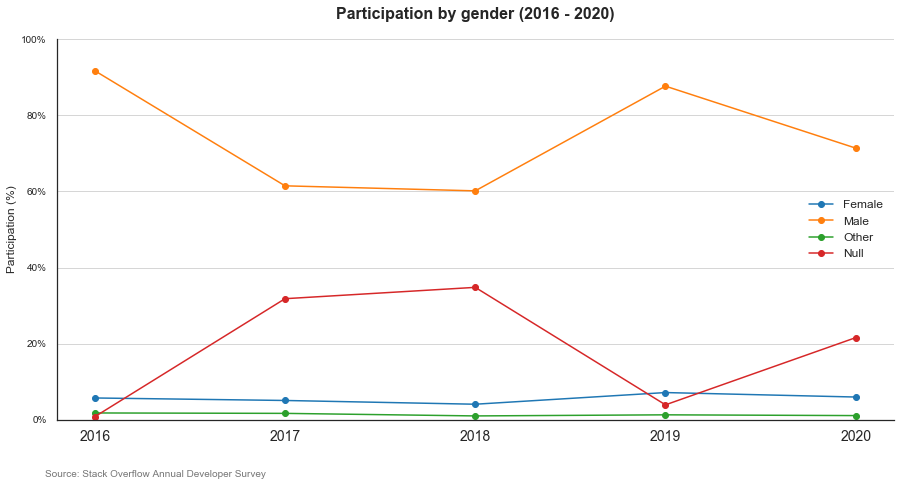

In [43]:
gender_time(df_gender)

I looks like women have constantly been under 10% of the respondents pool. It is worth noting, however, that many people choose to not declare their gender. We might want to look at what the composition of male, female and other are only among those people who chose to declare their gender.

In [44]:
# Define gender adjusted dataset
df_gender_adj = df_gender[['year', 'gender_male', 'gender_female', 'gender_other']]

# Set sum of relevat variables
sum_gender = df_gender_adj[['gender_male', 'gender_female', 'gender_other']].sum(axis=1)

# Adjust categories by only those who declared their gender
df_gender_adj['gender_male'] = df_gender_adj['gender_male']/sum_gender
df_gender_adj['gender_female'] = df_gender_adj['gender_female']/sum_gender
df_gender_adj['gender_other'] = df_gender_adj['gender_other']/sum_gender

# Multiply by 100 for percentages
genders_adj = ['gender_female', 'gender_male', 'gender_other']
for gender_adj in genders_adj:
    df_gender_adj[gender_adj] = df_gender_adj[gender_adj]*100
    
# Print adjusted gender distributions
df_gender_adj.head()

,year,gender_male,gender_female,gender_other
0,2016,92.447739,5.760443,1.791818
1,2017,90.133250,7.418609,2.448141
2,2018,92.227272,6.243311,1.529417
3,2019,91.233637,7.428050,1.338313
4,2020,91.012125,7.603299,1.384576


With this in hands we can reproduce the graph we did before.

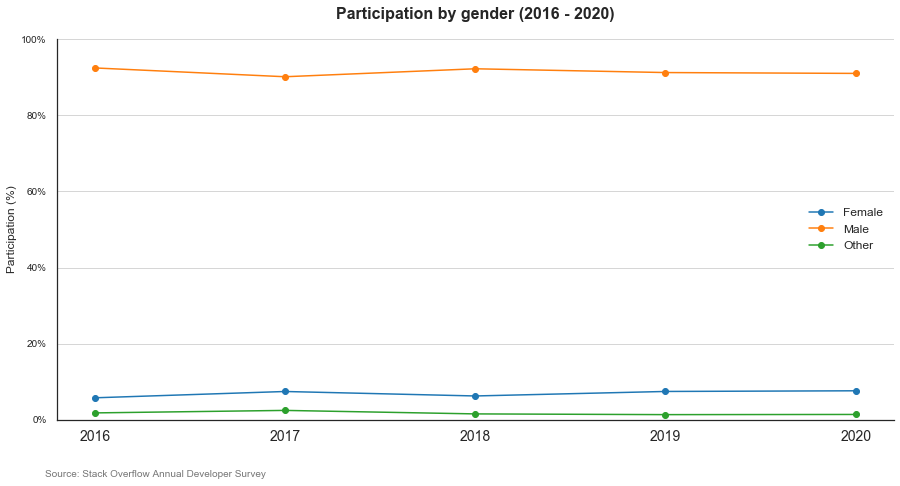

In [45]:
# Plot adjusted graph
gender_time(df_gender_adj)

This is no surprise as men did constitute the majority of respondents before. This exercise does indicate, however, that there is a lack of participation of women (and other gender identifications) in the Stack Overflow Annual Developer Survey, which could indicate a wider trend in the tech industry that needs to be addressed. Ideally we would want a higher participation of women in the tech industry.

Another interesting way to see how the participation of female respondents has change is through an animation. In order to do that let's pick 10 countries with over 1000 respondents and plot a bar chart race to see how the composition of female respondents from these countries has changed over the last 5 years. To begin, let's define a function to graph female participation for a selection of 10 countries with over 1,000 female respondents.

In [46]:
# Define function to plot bar charts for selected countries
def female_countries(survey_):
    """This function plots a bar chart for selected
       countries for the dataframe passed as argument.
    """
    # Set size of plot
    fig, ax = plt.subplots(figsize=(15, 7))
    # Clear plot
    plt.cla()
    # Define what year dataframe refers to and name to be saved
    year = survey_['year'].unique()[0]
    name = '../figures/female_participation_{}.png'.format(year)
    # Filter only necessary data
    plot_df = survey_[['year', 'gender_female', 'country']].groupby('country', as_index = False).mean()
    # List countries to be looked at with colors to be matched to
    colors = dict(zip(['United States','Canada', 'Russian Federation', 'United Kingdom', 'Germany',
                       'France', 'Netherlands', 'Brazil', 'Australia', 'India'],
                      ['#e48381' , '#e48381', '#adb0ff', '#adb0ff', '#adb0ff', '#adb0ff', '#adb0ff',
                       '#90d595', '#b97bff', '#f7bb5f']))
    # Define dataframe with countries of interest
    plot_df = plot_df.loc[plot_df['country'].isin(colors.keys())]
    # Set colors and pass them
    group_lk = plot_df.set_index('country').to_dict()
    ax.barh(plot_df['country'], plot_df['gender_female'], color= [colors[x] for x in plot_df['country']])
    # Plot labels and values by iterating
    for i, (value, country) in enumerate(zip(plot_df['gender_female'], plot_df['country'])):
        ax.text(value + 0.002, i, str(round(100*float(value), 2)) + '%', ha = 'left')
    # Add title, axis name and legend
    plt.title('Percentage of female respondents', weight = 'bold', fontsize = 16, pad = 20)
    #ax.text(0.6, -0.15, 'Participation (%)', transform = ax.transAxes, size = 12, ha = 'right')
    ax.text(0.25, -0.1, 'Source: Stack Overflow Annual Developer Survey', transform=ax.transAxes, ha='right',
                color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    # Add ticks and other details
    ax.text(1, 0.4, year, transform=ax.transAxes, size=46, ha='right', weight=800)
    #ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(axis = 'x', labelsize=12)
    ax.grid(which = 'major', axis='x', linestyle='-')
    plt.xticks([0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12])
    ax.tick_params(axis = 'x', pad = 10)
    plt.yticks(fontsize = 14)  
    plt.box(False)
    plt.savefig(name)

We can see at what this graph looks like for a random year.

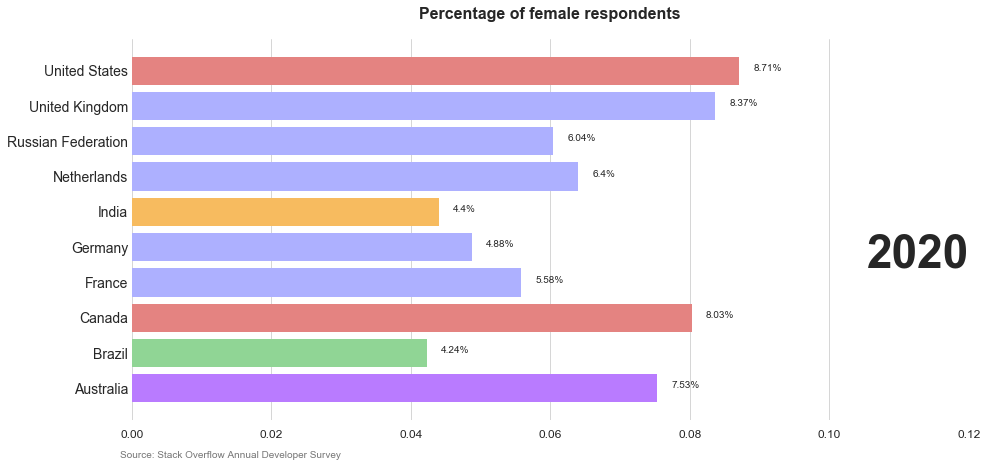

In [47]:
female_countries(survey_2020)

We can then proceed to save a png file for each year.

In [48]:
%%capture
# Save files for all years
female_countries(survey_2020)
female_countries(survey_2019)
female_countries(survey_2018)
female_countries(survey_2017)
female_countries(survey_2016)

Finally, we can use imageio to create a gif, by coupling all figures together

In [49]:
# List map files
files = ['../figures/female_participation_2016.png',
        '../figures/female_participation_2017.png',
        '../figures/female_participation_2018.png',
        '../figures/female_participation_2019.png',
        '../figures/female_participation_2020.png']

# Read with imageio
images = [imageio.imread(file) for file in files]

# Save gif
imageio.mimwrite('../figures/female_participation.gif', images, fps = 1)

And this is what is looks like:

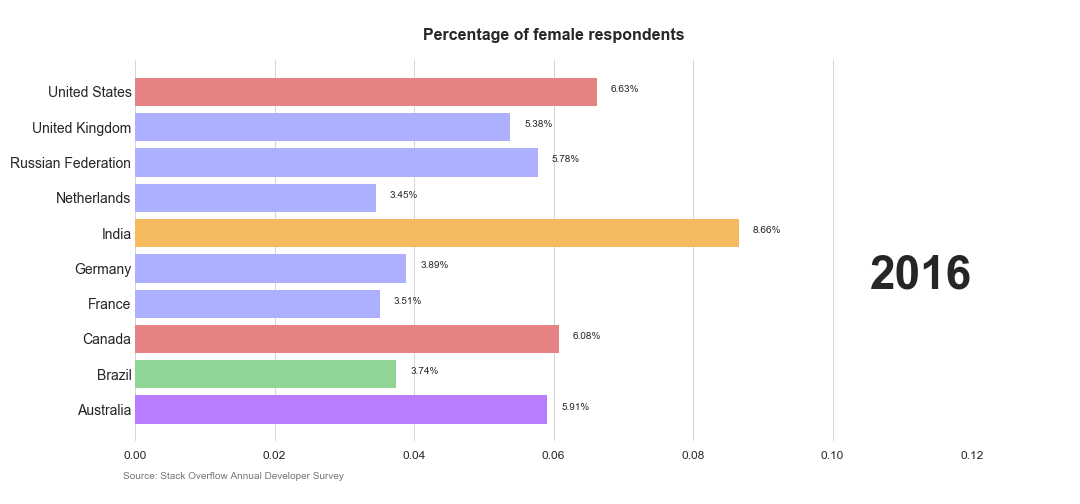

In [50]:
# Plot gif for all respondents
Image(open('../figures/female_participation.gif','rb').read())

At a first glance it looks like female participations in these countries has grown a little since 2016. That, however, is not true for all countries. Notably, India seems to have had a higher female participation in the survey in 2016 than it did in 2020. Some other countries, such as Australia and the United States, see a bigger increase in female participation. Notwithstanding these observations, none of the countries above has more than 10% of respondents being female.

<a name="q2"></a>
### Are men happier than women in the tech world?

Seeing that the majority of survey respondents are men, we could check if this translates into men having a higher job satisfaction than women and other gender identities. In order to visualize how job satisfaction varies across gender (and employment) let's define the function below:

In [51]:
# Define function to plot bars
def plot_gender_job(df_):
    """This function plots bar graphs for job satisfaction rate
       with standard deviations for each gender and each job category.
    """
    # Set dataframe and necessary variables
    df = df_[['employment', 'gender', 'satisfaction_score', 'year']]
    year = df['year'].unique()[0]
    name = '../figures/gender_job_{}.png'.format(year)
    # Set figure
    fig, ax = plt.subplots(figsize=(16, 7))
    # Width of the bars
    barWidth = 0.3
    # Bars for each gender
    bar_men = [df[df.employment == cat][df.gender == 'Male'].mean()['satisfaction_score'] for cat in employment_cat]
    bar_women = [df[df.employment == cat][df.gender == 'Female'].mean()['satisfaction_score'] for cat in employment_cat]
    bar_other = [df[df.employment == cat][df.gender == 'Other'].mean()['satisfaction_score'] for cat in employment_cat]
    # Standard deviations
    std_men = [df[df.employment == cat][df.gender == 'Male'].std()['satisfaction_score'] for cat in employment_cat]
    std_women = [df[df.employment == cat][df.gender == 'Female'].std()['satisfaction_score'] for cat in employment_cat]
    std_other = [df[df.employment == cat][df.gender == 'Other'].std()['satisfaction_score'] for cat in employment_cat]
    # Position of categories
    r1 = np.arange(len(bar_men))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
    # Create bars
    plt.bar(r1, bar_men, width = barWidth, color = '#e48381', edgecolor = '#777777', yerr = std_men, capsize = 7, label = 'Men')
    plt.bar(r2, bar_women, width = barWidth, color = '#adb0ff', edgecolor = '#777777', yerr = std_women, capsize = 7, label = 'Women')
    plt.bar(r3, bar_other, width = barWidth, color = '#90d595', edgecolor = '#777777', yerr = std_other, capsize = 7, label = 'Other')
    # Specificatoins
    plt.xticks([r + barWidth for r in range(len(bars1))], ['Full-time', 'Part-time', 'Self-employed'])
    plt.ylabel('height')
    plt.legend(prop = {'size': 14}, bbox_to_anchor=(1.12, 0.9))
    # Titles and labels
    plt.title('Job satisfaction score by gender and employment status', weight = 'bold', fontsize = 16, pad = 20)
    ax.text(0.25, -0.15, 'Source: Stack Overflow Annual Developer Survey', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha = 0.8, edgecolor='white'))
    ax.text(1.12, 0.42, year, transform = ax.transAxes, size = 46, ha='right', weight = 800)
    plt.ylabel("Score", fontsize = 16, labelpad = 20)
    # No top and left lines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    # Axis specifications
    ax.tick_params(axis = 'x', labelsize = 16, pad = 20)
    ax.tick_params(axis = 'y', labelsize = 14, pad = 20)
    ax.grid(which = 'major', axis='y', linestyle='-')
    # Show graphic
    plt.box(False)
    # Save
    plt.savefig(name)
    

We can then save one png file for each year as follows

In [52]:
%%capture
# Save plot for each year
plot_gender_job(survey_2020)
plot_gender_job(survey_2019)
plot_gender_job(survey_2018)
plot_gender_job(survey_2017)
plot_gender_job(survey_2016)

NameError: name 'employment_cat' is not defined

Let's take a look at what this graph looks like

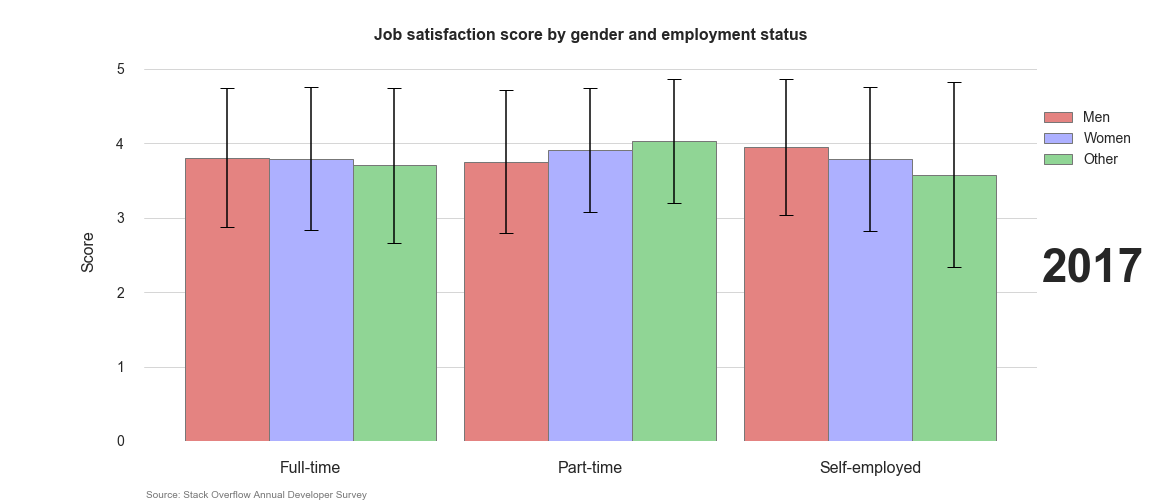

In [53]:
# Plot bar graph for 2017
Image(open('../figures/gender_job_2017.png','rb').read())

With the plots for each years in hand we can do what in did for the previous question and put them together into an animation as shown below.

In [54]:
# List map files
files = ['../figures/gender_job_2016.png',
        '../figures/gender_job_2017.png',
        '../figures/gender_job_2018.png',
        '../figures/gender_job_2019.png',
        '../figures/gender_job_2020.png']

# Read with imageio
images = [imageio.imread(file) for file in files]

# Save gif
imageio.mimwrite('../figures/gender_job.gif', images, fps = 1)

This gives us the following:

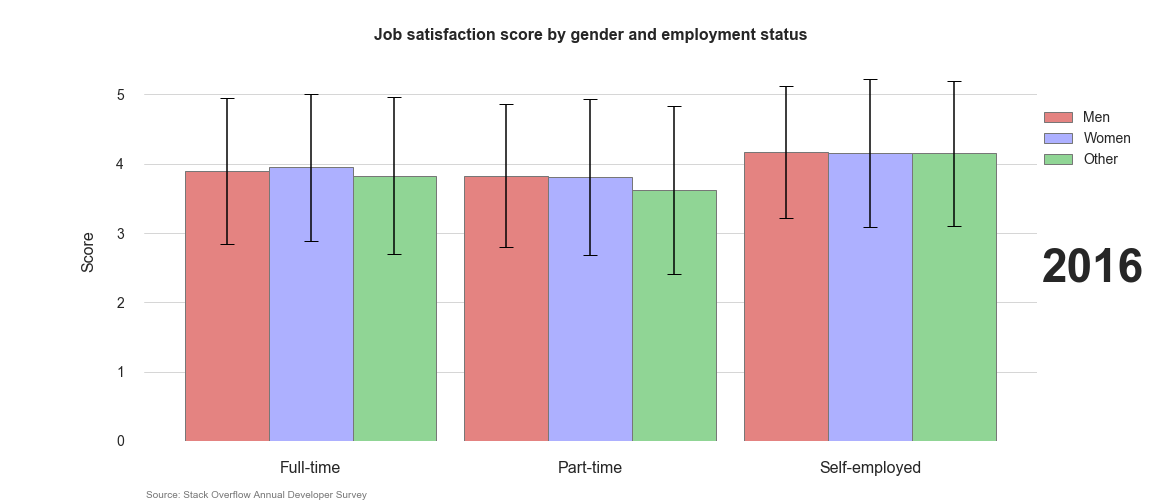

In [55]:
# Plot animation
Image(open('../figures/gender_job.gif','rb').read())

It doesn't look like there is a significantly difference in job satisfaction over the years between genders. Note, however, that it does seem that happiness levels were slightly higher in 2016 and 2017. It is also interesting to observe that there seems to have a tendency of lower job satisfaction after 2017. This appears to be true for all genders.

<a name="q3"></a>
### What countries have the highest job satisfaction for women?

Since we can plot a map with geopandas, it might be interesting to see how countries around world compare in terms of job satisfaction. In order to do this, we can create a function that organizes our data and plots a map of job satisfaction scores for every country around the world by employment category.

In [56]:
def plot_satisfaction_map(df, df_map, cat):
    """This function organizes the survey dataframe,
       merges it with map geopandas dataframe and filters
       for specific job category and plots a map.
    """
    # Select only female respondents
    df = df[df.gender_female == 1]
    # Filter employment category
    if cat == 'full-time':
        empl_filter = df[df.employment == 'Full-time']
        col_pal = 'Greens'
    elif cat == 'part-time':
        empl_filter = df[df.employment == 'Part-time']
        col_pal = 'Purples'
    else:
        empl_filter = df
        col_pal = 'Blues'
    # Group data by country code with gender variables
    q3 = empl_filter[['satisfaction_score', 'country_numeric', 'year']].groupby('country_numeric', as_index = False).mean()
    # Join data with maps
    map_q3 = df_map.set_index('CNTRY_CODE').join(q3.set_index('country_numeric'))
    # Define year variable and plot name
    year = str(int(map_q3['year'].mean()))
    name = '../figures/job_satisfaction_map_{}_{}.png'.format(cat, year)
    # Get values for colorbar
    vmin, vmax, vcenter = 1, 5, 3
    divnorm = colors.DivergingNorm(vmin = vmin, vcenter = vcenter, vmax = vmax)
    # Create normalized colorbar
    cbar = plt.cm.ScalarMappable(norm=divnorm, cmap = col_pal)
    # Plot subplots and maps
    fig, ax = plt.subplots(1,figsize=(15, 7)) 
    plt.tight_layout()
    map_q3.plot(ax = ax, color = 'grey') # Fill non-available grey
    map_q3.plot(column = 'satisfaction_score', cmap = col_pal, ax = ax)
    # Specify title depending on category
    if cat == 'all':
        plt.title('Job satisfaction scores for women around the world', weight = 'bold', fontsize = 16, pad = 20)
    else:
        plt.title('Job satisfaction scores for women in {} positions around the world'.format(cat), weight = 'bold', fontsize = 16, pad = 20)
    # Graph specifications
    plt.annotate('Source: Stack Overflow Annual Developer Survey, {}'.format(year), xy = (0.05, 0.08),  xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, color = '#555555')
    plt.annotate(str(year), xy = (0.08, 0.5), xycoords = 'figure fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 44, weight = 800)
    fig.colorbar(cbar, ax = ax, shrink = 0.8)
    ax.set_axis_off()
    # Save plot
    plt.savefig(name)


Perfect! Now we can save these as png files in the figures folder.

In [57]:
%%capture
# Save maps for each year for all respondents
plot_satisfaction_map(survey_2020, map_df, 'all')
plot_satisfaction_map(survey_2019, map_df, 'all')
plot_satisfaction_map(survey_2018, map_df, 'all')
plot_satisfaction_map(survey_2017, map_df, 'all')
plot_satisfaction_map(survey_2016, map_df, 'all')

# Save maps for each year for part-time respondents
plot_satisfaction_map(survey_2020, map_df, 'part-time')
plot_satisfaction_map(survey_2019, map_df, 'part-time')
plot_satisfaction_map(survey_2018, map_df, 'part-time')
plot_satisfaction_map(survey_2017, map_df, 'part-time')
plot_satisfaction_map(survey_2016, map_df, 'part-time')

# Save maps for each year for full-time respondents
plot_satisfaction_map(survey_2020, map_df, 'full-time')
plot_satisfaction_map(survey_2019, map_df, 'full-time')
plot_satisfaction_map(survey_2018, map_df, 'full-time')
plot_satisfaction_map(survey_2017, map_df, 'full-time')
plot_satisfaction_map(survey_2016, map_df, 'full-time')

We can look at what the graph would look like for one of the years. Let's see what 2020 for all workers looks like.

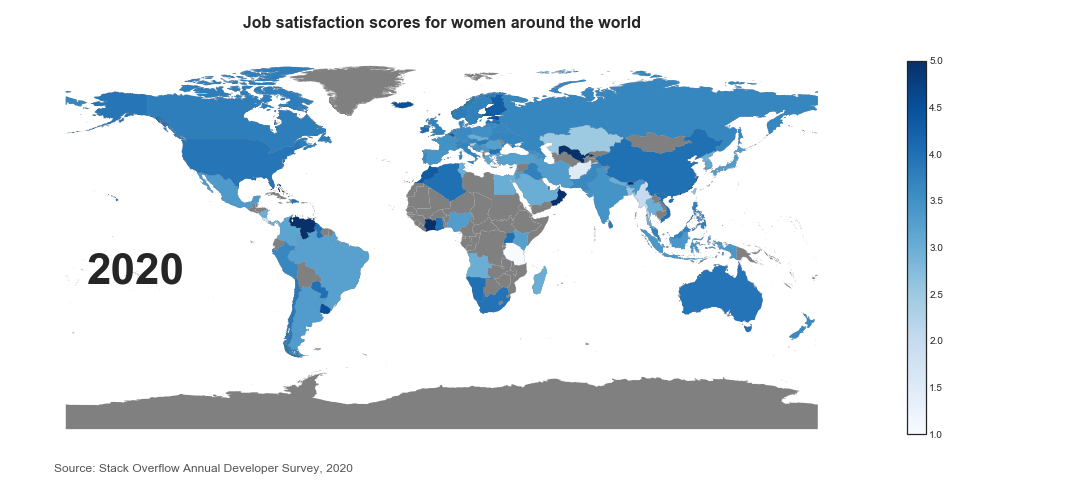

In [58]:
# Plot map for all respondents in 2020
Image(open('../figures/job_satisfaction_map_all_2020.png','rb').read())

This map is insteresting as it shows that there are a few outliers when it comes to job satisfaction. Now, we have to be careful when looking at this. Some countries might have very few respondents, which can cause the average job satisfaction index to be pulled up or down very easily. Another problem with this is that it gives us a snapshot of the map at one point in time. In order to see how job satisfaction changes overtime we can make a gif with all the maps we created!

In [59]:
# List map files
files_all = ['../figures/job_satisfaction_map_all_2016.png',
             '../figures/job_satisfaction_map_all_2017.png',
             '../figures/job_satisfaction_map_all_2018.png',
             '../figures/job_satisfaction_map_all_2019.png',
             '../figures/job_satisfaction_map_all_2020.png']
files_part = ['../figures/job_satisfaction_map_part-time_2016.png',
             '../figures/job_satisfaction_map_part-time_2017.png',
             '../figures/job_satisfaction_map_part-time_2018.png',
             '../figures/job_satisfaction_map_part-time_2019.png',
             '../figures/job_satisfaction_map_part-time_2020.png']
files_full = ['../figures/job_satisfaction_map_full-time_2016.png',
             '../figures/job_satisfaction_map_full-time_2017.png',
             '../figures/job_satisfaction_map_full-time_2018.png',
             '../figures/job_satisfaction_map_full-time_2019.png',
             '../figures/job_satisfaction_map_full-time_2020.png']

# Read with imageio
images_all = [imageio.imread(file) for file in files_all]
images_part = [imageio.imread(file) for file in files_part]
images_full = [imageio.imread(file) for file in files_full]

# Save gif
imageio.mimwrite('../figures/job_satisfaction_all.gif', images_all, fps = 1)
imageio.mimwrite('../figures/job_satisfaction_part.gif', images_part, fps = 1)
imageio.mimwrite('../figures/job_satisfaction_full.gif', images_full, fps = 1)

Let's take a look at what the gift looks like for an example year and job category 

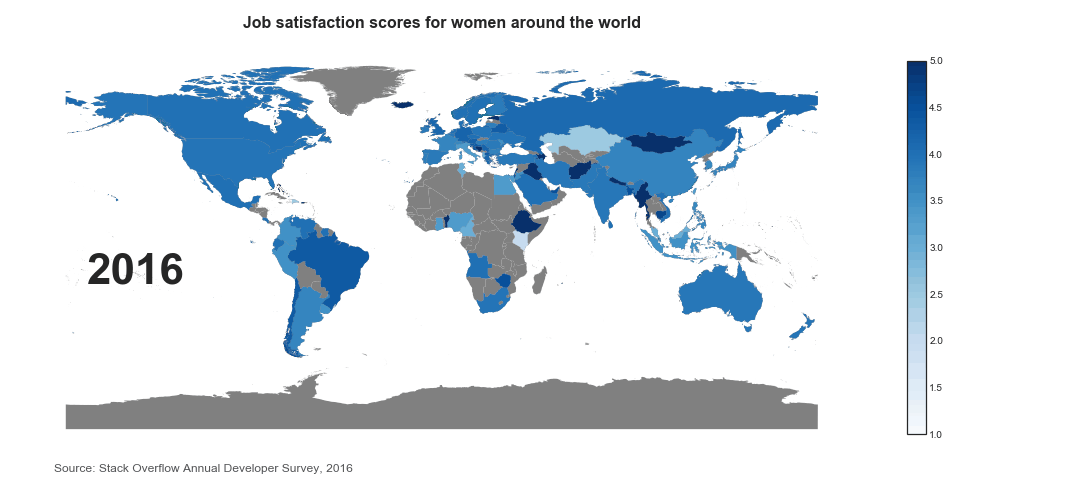

In [60]:
# Plot gif for all respondents
Image(open('../figures/job_satisfaction_all.gif','rb').read())

That is very interesting! We see that there is no clear trend of job satisfaction getting higher or lower. We see, however, that some regions tend to stay on the higher end of the job satisfaction spectrum (US and Canda and the Nordic countries are examples). Lastly, it looks like in 2017 somebody in Antarctica answered to the survey and was very happy with their job. Could that be true? Yes, maybe a happy coder moved to Antactica and is happy to work alongside pengiuns. However, most likely this was someone lying about where they live or checking Antarctica by mistake.

<a name="eval"></a>
## 5. Evaluate the results

The exercise above showed how the participation of women in the Stack Overflow Annual Developer surveys has changed over the years. In particular, it is worth highlighting the following insights from this exercise:
- There participation of women in the Stack Overflow Annual Developer surveys has not significantly changed over the last five years.
- Job satisfaction for women is not significantly different from that on men or people who identify with other genders.
- Job satisfaction for women working full-time seems to be slightly higher in some regions of the world.
- Many countries do not have part-time female workers answer to the Stack Overflow Developer surveys.

The observations above indicate that there is still a lot to do when it comes to gender diversity in the tech world. In particular, it would be interesting to see policies that increase the number of women in tech.

<a name="deploy"></a>
## 6. Deploy

This notebook served as a guide for the results and visualizations in [this blog post](https://medium.com/@gabrielsgaspar/women-in-tech-a-look-at-the-stack-overflow-annual-developer-surveys-7ffacf0586c2).